In [114]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# evaluation metrics
from sklearn.metrics import f1_score
# datasets
from sklearn.datasets import fetch_openml, fetch_20newsgroups
import pandas as pd
import numpy as np

In [2]:
mnist = fetch_openml("mnist_784")
mnist_X = mnist.data.to_numpy()/255.0
mnist_y = mnist.target

/Users/jay/opt/anaconda3/envs/USML/lib/python3.8/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [16]:
spambase = pd.read_csv("spambase/spambase.data", delimiter=",", header=None)

In [17]:
# normalise spambase dataset
for i in spambase.columns[:-1]:
    spambase[i] = (spambase[i] - spambase[i].mean())/spambase[i].std()

# MNIST Dataset

In [22]:
# train/test split
mnist_X_train, mnist_X_test, mnist_y_train, mnist_y_test = train_test_split(mnist_X, mnist_y, stratify=mnist_y, test_size=0.2)

In [50]:
log_reg = LogisticRegression()
log_reg.fit(mnist_X_train, mnist_y_train)

/Users/jay/opt/anaconda3/envs/USML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [59]:
y_pred = log_reg.predict(mnist_X_test)
print(f1_score(mnist_y_test, y_pred, average='weighted'))

0.9251363792001647


<Axes: ylabel='Feature'>

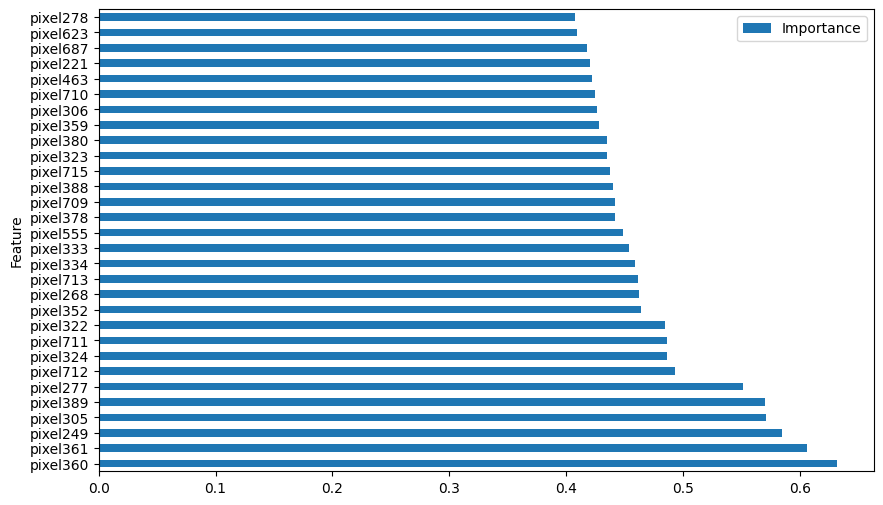

In [76]:
avg_importance = np.mean(np.abs(log_reg.coef_), axis=0)
feature_importance = pd.DataFrame({'Feature': mnist.data.columns, 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance = feature_importance.iloc[:30, :]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [77]:
tree_clf = DecisionTreeClassifier(criterion="entropy")
tree_clf.fit(mnist_X_train, mnist_y_train)

DecisionTreeClassifier(criterion='entropy')

In [78]:
y_pred = tree_clf.predict(mnist_X_test)
print(f1_score(mnist_y_test, y_pred, average='weighted'))

0.8817364211221902


<Axes: ylabel='Feature'>

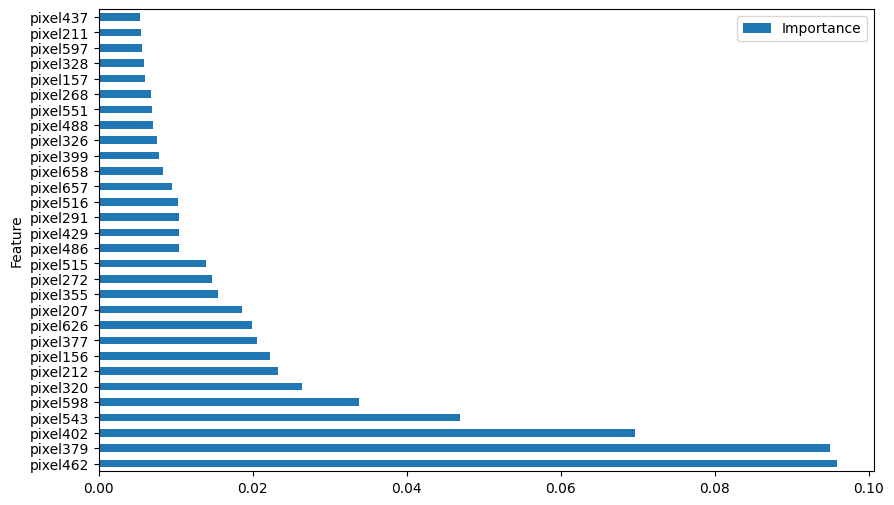

In [89]:
feature_importance = pd.DataFrame({'Feature': mnist.data.columns, 'Importance': np.abs(tree_clf.feature_importances_)})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance = feature_importance.iloc[:30, :]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

# SpamBase Dataset

In [96]:
spambase_X_train, spambase_X_test, spambase_y_train, spambase_y_test = train_test_split(spambase.iloc[:, :-1], spambase.iloc[:, -1], test_size=0.2, stratify=spambase.iloc[:, -1])

In [97]:
log_reg = LogisticRegression()
log_reg.fit(spambase_X_train, spambase_y_train)

LogisticRegression()

In [105]:
y_pred = log_reg.predict(spambase_X_test)
print(f1_score(spambase_y_test, y_pred))

0.8932584269662921


<Axes: ylabel='Feature'>

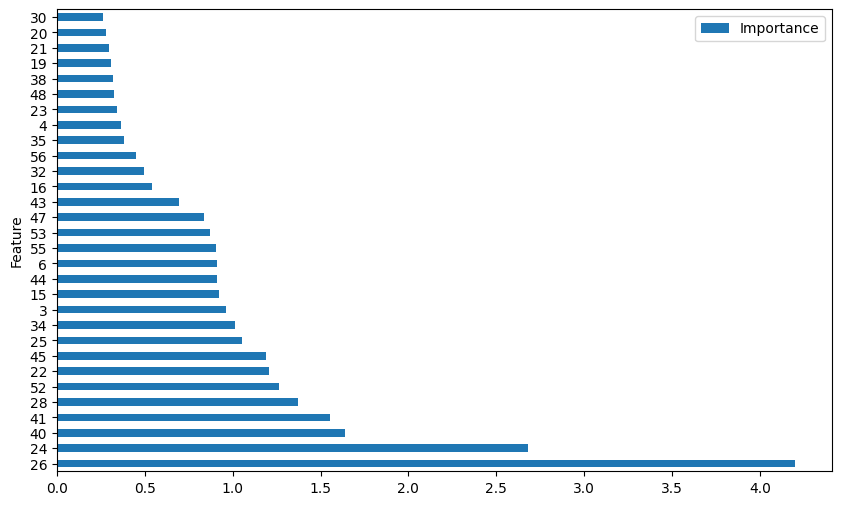

In [103]:
feature_importance = pd.DataFrame({'Feature': spambase.columns[:-1], 'Importance': np.abs(log_reg.coef_[0])})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance = feature_importance.iloc[:30, :]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [107]:
tree_clf = DecisionTreeClassifier(criterion="entropy")
tree_clf.fit(spambase_X_train, spambase_y_train)
y_pred = tree_clf.predict(spambase_X_test)
print(f1_score(spambase_y_test, y_pred))

0.9083215796897037


<Axes: ylabel='Feature'>

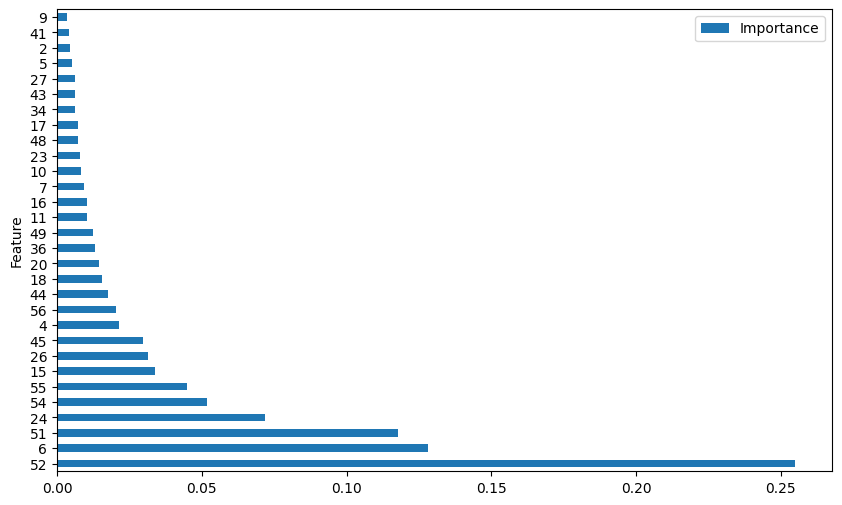

In [108]:
feature_importance = pd.DataFrame({'Feature': spambase.columns[:-1], 'Importance': tree_clf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance = feature_importance.iloc[:30, :]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

# 20 NG Dataset

In [122]:
newsgroups = fetch_20newsgroups(subset='all', shuffle=True, random_state=42,
                                    remove=("headers", "footers", "quotes"))
# Converting Text data to vectors
vectorizer = TfidfVectorizer(max_features=2000)

X = newsgroups.data
y = newsgroups.target
vectors = vectorizer.fit_transform(X)
ng_train_X, ng_test_X, ng_train_y, ng_test_y = train_test_split(vectors, y, stratify=y, test_size=0.2)

In [123]:
log_reg = LogisticRegression()
log_reg.fit(ng_train_X, ng_train_y)

/Users/jay/opt/anaconda3/envs/USML/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [124]:
y_pred = log_reg.predict(ng_test_X)
print(f1_score(ng_test_y, y_pred, average='weighted'))

0.6238882304845285


<Axes: ylabel='Feature'>

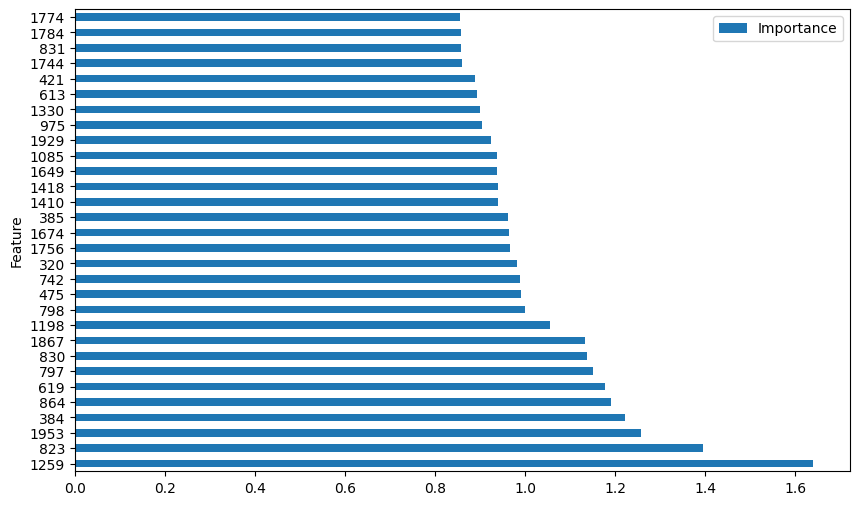

In [125]:
avg_importance = np.mean(np.abs(log_reg.coef_), axis=0)
feature_importance = pd.DataFrame({'Feature': list(range(avg_importance.shape[0])), 'Importance': avg_importance})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance = feature_importance.iloc[:30, :]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [130]:
tree_clf= DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)
tree_clf.fit(ng_train_X, ng_train_y)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=10)

<Axes: ylabel='Feature'>

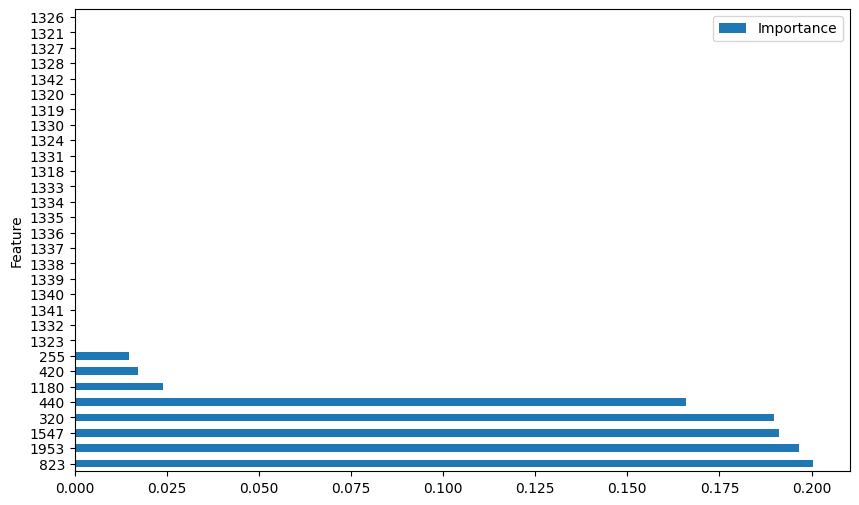

In [131]:
feature_importance = pd.DataFrame({'Feature': list(range(tree_clf.feature_importances_.shape[0])), 'Importance': tree_clf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance = feature_importance.iloc[:30, :]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))

In [132]:
tree_clf= DecisionTreeClassifier(max_depth=20, max_leaf_nodes=20)
tree_clf.fit(ng_train_X, ng_train_y)

DecisionTreeClassifier(max_depth=20, max_leaf_nodes=20)

<Axes: ylabel='Feature'>

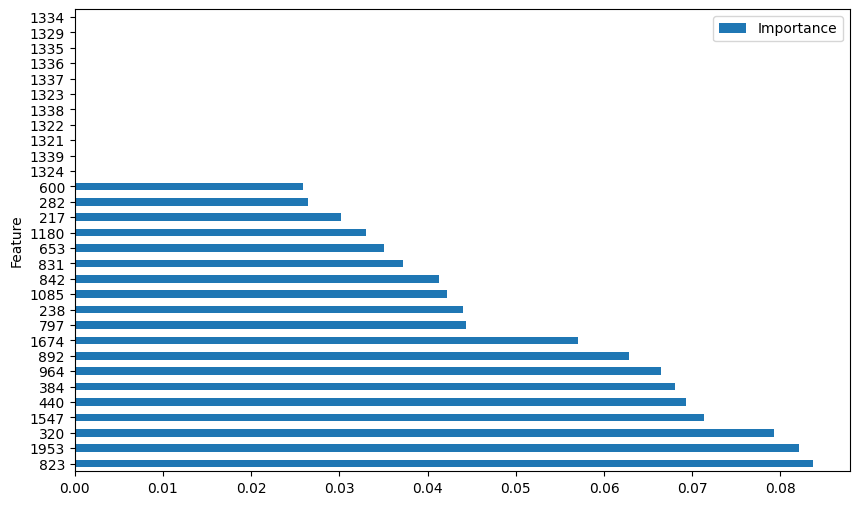

In [133]:
feature_importance = pd.DataFrame({'Feature': list(range(tree_clf.feature_importances_.shape[0])), 'Importance': tree_clf.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance = feature_importance.iloc[:30, :]
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(10, 6))